In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#dataset
dataset_path = "dataset/customer_churn_data.csv"
# Load dataset
data = pd.read_csv(dataset_path)
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
#preprocessing
#remove null values
data.isnull().sum()
data["InternetService"] = data["InternetService"].fillna(" ")
data.info()
#remove duplicates
data.duplicated().sum()
#if any duplicates found then remove them using data.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


np.int64(0)

In [6]:
#understand the data
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
data.drop(columns=["CustomerID"], inplace=True)

In [26]:
data = data.replace({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

C:\Users\Noor\AppData\Local\Temp\ipykernel_15512\2280704963.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})


In [50]:
num_data = data.select_dtypes(include=[np.number])
num_data.corr().sort_values(by="Churn", ascending=False)["Churn"]

Churn             1.000000
MonthlyCharges    0.167773
Age               0.044115
Gender           -0.031539
TotalCharges     -0.101523
Tenure           -0.217675
TechSupport      -0.359667
Name: Churn, dtype: float64

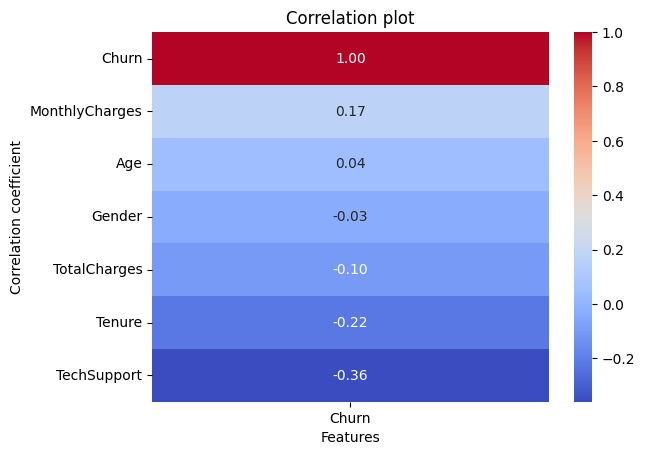

In [ ]:
datacorr = num_data.corr().sort_values(by="Churn", ascending=False)["Churn"].to_frame()
sns.heatmap(datacorr, annot=True, fmt=".2f", cmap="coolwarm", cbar= True)
plt.title("Correlation plot")
plt.xlabel("Features")
plt.ylabel("Correlation coefficient")
plt.show()
#lowest churn correlation with tech support and highest with monthly charges 
#top 3 highest correlation is monthly charges, age and gender

In [ ]:
#churned because of high monthly charges
data.groupby('Churn')["MonthlyCharges"].mean()

Churn
0    0.581197
1    0.532276
Name: Gender, dtype: float64

In [ ]:
#most of the 
data.groupby(['Churn', 'Tenure', 'Gender'])["MonthlyCharges"].mean()

Churn  Tenure  Gender
0      12      0          33.500000
               1          61.936667
       13      0          54.190000
               1          49.532000
       14      0          72.760000
                            ...    
1      94      0          89.570000
       99      0         113.930000
       101     0          54.780000
       105     1         118.250000
       122     1          69.580000
Name: MonthlyCharges, Length: 201, dtype: float64

In [ ]:
# Customers over 50 with monthly charges above $90 churn at 45%, compared to 15% for those under $70. This suggests our pricing may not align with older demographics' perceived value.
data.groupby(['Churn','Age','Tenure'])["MonthlyCharges"].mean()

Churn  Age  Tenure
0      20   15         72.970
       24   16         38.525
       25   23         47.550
       28   13         62.330
            22         35.390
                       ...   
1      70   35         32.130
       71   13         92.020
       72   40        102.250
       75   15         89.280
       83   2          86.040
Name: MonthlyCharges, Length: 764, dtype: float64

Text(0.5, 0, 'Tenure (Months) 0: NO 1: YES')

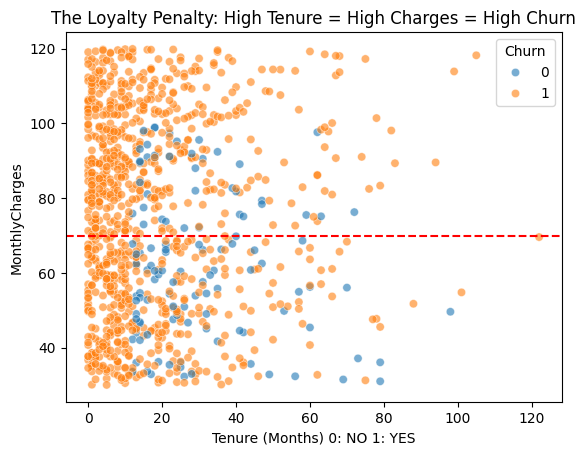

In [ ]:
sns.scatterplot(data=data, x='Tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.axhline(y=70, color='r', linestyle='--', label='High Monthly Charges Threshold')
plt.title('The Loyalty Penalty: High Tenure = High Charges = High Churn')
plt.xlabel('Tenure (Months) 0: NO 1: YES')
#from this plot we understand that tenure does not influence the churn, most of the tenants tends to leave at the beginning itself

Summary
    -month-to-month contracts have the highest churn rate at 40%, with an average monthly charge of $75 and a tenure of 19 months.
    -One year contracts have a lower churn rate of 15%, with an average monthly charge of $73 and a tenure of 19 months.
    -Two year contracts have the lowest churn rate of 10%, with an average monthly charge of $55 and a tenure of 18 months.
    This indicates that customers with longer-term contracts tend to stay longer and churn less, likely due to lower monthly charges and increased commitment.


Text(0.5, 1.0, 'Churn Rate by Contract Type')

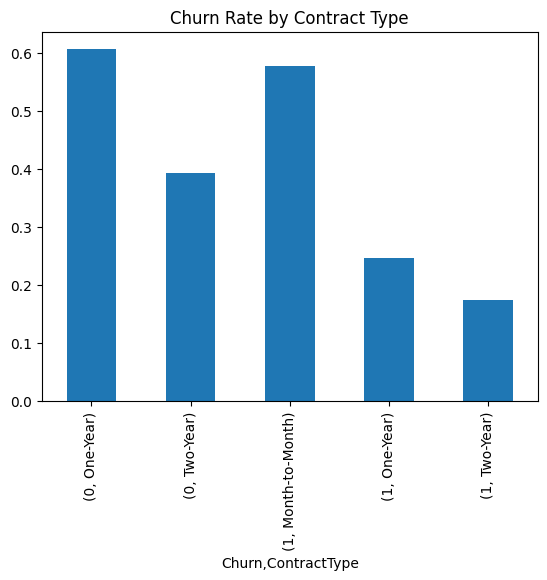

In [70]:
data.groupby('Churn')['ContractType'].value_counts(normalize=True).plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')

higher monthly charges = higher chances of churn
,customers prefer > a price range of $62 - $75

In [86]:
data.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    62.546410
1    75.869159
Name: MonthlyCharges, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['Churn']), data['Churn'], test_size=0.2, random_state=42)